<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Experimental Maths 2: Test


## Table of contents



In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

import sympy as sympy             # package for symbolic computation
from sympy import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)


**A few comments before starting:** (not in any order of importance)

- The project is individual.
- Some questions need to be done in order, but not all.
- You are more than welcome to propose additional questions or ideas related to the project (originality will be rewarded and is necessary to get A+). There are several ideas (around Markov chains, generating functions, etc.) that could be explored (do ask me if you want to make sure you're not going in the wrong direction). However, you do not need to do anything groundbreaking or that works perfectly to score marks; the most important thing is that you show initiative.
- This will not be graded like your tests, so make sure your answers are presented clearly (that also means concisely) and cleanly. I will take presentation into account when marking your project (make sure you use LaTeX when writing your answers, or I will not read them).
- It is better to take the time to do a few questions cleanly than to botch all the questions.
- You are expected to comment/explain your code.
- Provide tests to all your functions.
- You should justify your answers as rigorously as possible (though any result that SymPy outputs can be taken as proof).
- It is strongly discouraged to introduce any notions more advanced than second-year university if you do not understand them (if you are not sure, ask me).

The marking scheme will be as follows:
- 70% on the answers to questions (10% per question, so you don't need to do all the questions. If you do them all and, say, you score 71 points, then this mark will be capped at 70).
- 10% on overall presentation (presentation, clarity, and conciseness will also count towards the above 70%).
- 20% on originality (answering the more open-ended questions or complementing some questions will also count towards originality).

Consider the map
\begin{align}
    f: [0,1] &\longrightarrow [0,1] \\
    x&\longmapsto \mu x(1-x)
\end{align}
for $\mu \in [1, 4]$ and the dynamical system
$$x_{n+1} = f(x_n)$$
We denote by $f^{n}$ the function $f$ iterated $n$ times.

1. For different values of $\mu$, simulate this dynamical system for a large number of iterations and plot the last few iterations. Analyse your results.
   

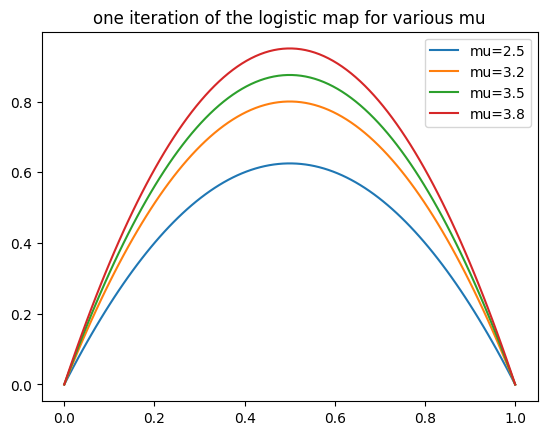

In [4]:
#first, let's give the function definition and plot a few iterations of the logistic map

def f (x=0.2, mu=3.5): #default parameters given for simplicity
    return mu*x*(1-x)
plt.figure()
for mu in [2.5, 3.2, 3.5, 3.8]:
    x = np.linspace(0, 1, 100)
    y = f(x, mu)
    plt.plot(x, y, label=f"mu={mu}")
plt.title("one iteration of the logistic map for various mu")
plt.legend()
plt.show()



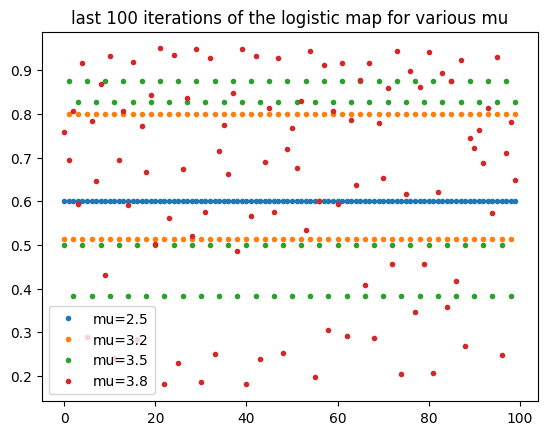

In [5]:
#this wraper iterates f multiple times and returns the last values
def logistic(mu, x0=0.2, iter=1000, last=100):
    x = x0
    # skip transients
    for _ in range(iter-last):
        x = mu * x * (1-x)
    xs = []
    for _ in range(last):
        x = mu * x * (1-x)
        xs.append(x)
    return xs
plt.figure()
for mu in [2.5, 3.2, 3.5, 3.8]:
    xs = logistic(mu)
    plt.plot(xs, '.', label=f"mu={mu}")

plt.title("last 100 iterations of the logistic map for various mu")
plt.legend()
plt.show()

In [6]:
# the following two cells render an interactive plot with a slider for \mu

# NEEDS
# python -m pip install ipympl
# pip install ipywidgets  

%matplotlib widget

from ipywidgets import FloatSlider
from IPython.display import display



FloatSlider(value=3.5, description='μ', max=4.0, min=1.0, step=0.01)

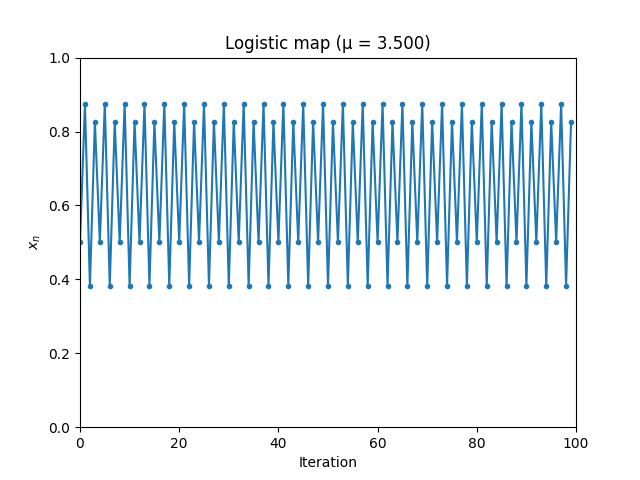

In [7]:
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', markersize=3)
ax.set_ylim(0, 1)
ax.set_xlabel("Iteration")
ax.set_ylabel("$x_n$")

def update(mu):
    y = logistic(mu, 0.1)
    line.set_data(range(len(y)), y)
    ax.set_xlim(0, len(y))
    ax.set_title(f"Logistic map (μ = {mu:.3f})")
    fig.canvas.draw_idle()

slider = FloatSlider(
    min=1.0,
    max=4.0,
    step=0.01,
    value=3.5,
    description='μ'
)

slider.observe(lambda change: update(change['new']), names='value')

display(slider)
update(slider.value)


One question that arises is whether the initial value of $x_0$ is relevant.

First, note that for $x_0 \in \{0,1\}$, $x_n = 0, \forall n$.

To study the cases when $ x_0 \in (0,1) $ this, we can "forsee" a few cases:
1) $\mu \in (1,3)$
2) $\mu \in (3,\mu_\infty)$
3) $\mu \in (\mu_\infty, 4)$

Case 1:
$f(x) = \mu \cdot x (1-x)$, so $f'(x) = \mu (1 - 2x)$ 

Notice that $x^* = 1 - \frac{1}{\mu}$ is a fixed point (i.e. $f(x^*) = x^*$)

Then, $\forall x \in (0,1)$, $|x^* - x_{n+1}| = |f(x^*) - f(x_n)| = |f'(c)||x^*-x_n|$,

for some $c \in [min\{x^*,x_n\},max\{x^*,x_n\}]$. It is easy to notice that $|f'(c)| < |f'(x^*)| = |\mu-2|$

$=> f'(c) < 1$, $ \forall c \in [\frac{1}{\mu},1-\frac{1}{\mu}]$

This means that $\forall x \in [\frac{1}{\mu},1-\frac{1}{\mu}]$, $|x^*-x_{n+1}| < |x^* - x_n|$, so $x_n \longrightarrow x^*$

Case 2: 
Here, the sequence has more (2 4 8 ...) converging subsequences

Case 3: 
if $x > x_\infty$, the sequence is simply chaotic.


FloatSlider(value=3.5, description='μ', max=3.6, min=3.5, step=0.001)

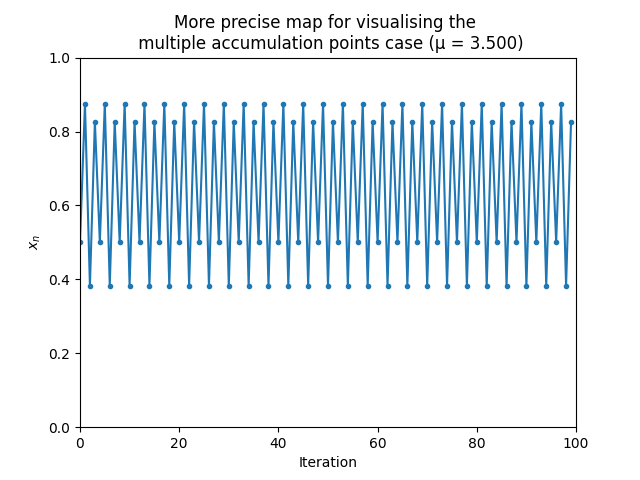

In [11]:
# illustrate the bifurcation diagram
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', markersize=3)
ax.set_ylim(0, 1)
ax.set_xlabel("Iteration")
ax.set_ylabel("$x_n$")

def update(mu):
    y = logistic(mu, 0.1)
    line.set_data(range(len(y)), y)
    ax.set_xlim(0, len(y))
    ax.set_title(f"More precise map for visualising the \n multiple accumulation points case (μ = {mu:.3f})")
    fig.canvas.draw_idle()

slider = FloatSlider(
    min=3.5,
    max=3.6,
    step=0.001,
    value=3.5,
    description='μ'
)

slider.observe(lambda change: update(change['new']), names='value')

display(slider)
update(slider.value)

2. Using SymPy, determine for which values of $\mu$ the dynamical system has an exponentially stable two-periodic point. We say that a periodic point $x^*$ is exponentially stable if there exist $\delta>0$ and $r \in (0,1)$ such that for all $x \in (x^* - \delta, x^* + \delta)$ and $n \in \mathbb{N}$
    $$|x^* - f^{(2n)}(x)|\leq r^n|x^*-x|.$$
For these values of $\mu$, find $\rho$ such that for all $x_0\in (x^* - \delta, x^* + \delta)$,
$$\lim_{n\to\infty}\frac{|x_{n+2}-x^*|}{|x_n-x^*|} = \rho$$
Check the value you found numerically.

3. For the rest of the project, assume $\mu = 4$. Let $(y_n)_{n\geq 0}$ be the sequence defined by recursion

    \begin{align*}
        y_0 &= 1/2\\
        y_{n+1} &= S(y_n)\qquad \text{for } n \geq 1
    \end{align*}
    
   where for a twice-continuously differentiable function $g$,
   $$S(y) = y - \frac{g(y)}{g'(y)}.$$
   Assume that $\lim_{n\to\infty}y_n =  y^*$. By Taylor expanding $S$ around $y^*$ (assuming $g'(y^*)\neq 0$), show that
   $$\frac{|y_{n+1} - y^*|}{|y_n-y^*|^2} \to \left|\frac{g''(y^*)}{2g'(y^*)}\right| \qquad\text{as } n\to\infty$$
   Compute derivatives of $S$ using SymPy by completing the code below (https://docs.sympy.org/latest/modules/functions/index.html).
   
   Use this map to numerically find a $3$-periodic orbit of $f$. By a theorem of Li and Yorke (1975), this implies that $f$ has orbits of all periods: can you adapt your code so that it finds orbits of any period?
      

In [12]:
from sympy import symbols, Function, diff, simplify

y = symbols('y')
g = Function('g')(y)

S = y - g/diff(g, y)

S1 = simplify(diff(S, y))
S2 = simplify(diff(S1, y))

S1, S2


(g(y)*Derivative(g(y), (y, 2))/Derivative(g(y), y)**2,
 (g(y)*Derivative(g(y), y)*Derivative(g(y), (y, 3)) - 2*g(y)*Derivative(g(y), (y, 2))**2 + Derivative(g(y), y)**2*Derivative(g(y), (y, 2)))/Derivative(g(y), y)**3)

In [13]:

def f(x):
    return 4*x*(1-x)

def f3(x):
    return f(f(f(x)))

def g(x):
    return f3(x) - x

def gprime(x, h=1e-8):
    return (g(x+h) - g(x-h))/(2*h)

def newton(x0, n=20):
    x = x0
    for _ in range(n):
        x = x - g(x)/gprime(x)
    return x

# initial guess
x_star = newton(0.2)
x_star

cycle = [x_star, f(x_star), f(f(x_star))]
cycle


[0.18825509907063326, 0.6112604669781572, 0.9504844339512096]

4. Consider the map
   $$T(z) =
    \begin{cases} 
    2 z & \text{if } 0 \le z < \frac{1}{2}, \\
    2 (1 - z) & \text{if } \frac{1}{2} \le z \le 1,
    \end{cases}.$$
   on $[0,1]$ and the dynamical system
    $$z_{n+1} = T(z_n)$$
   Plot $T$.

   Show that if
   \begin{align*}
       \phi : [0,1] &\longrightarrow [0,1]\\
               z &\longmapsto \sin^2\left(\frac{\pi z}{2}\right)
   \end{align*}
   then
    $$ f= \phi \circ T \circ \phi^{-1}\qquad\text{and}\qquad T = \phi^{-1}\circ f \circ \phi$$ 
   and show that $T$ has a $p$-periodic orbit if and only if $f$ has a $p$-periodic orbit.
   

5. Can you use $T$ to find a $3$-periodic orbit of $f$? Verify your answer with SymPy and compare your result with question 3.
   

6. Write code which computes the number of $p$-periodic *points* of $T$ and thus $f$ (a $p$-periodic orbit has $p$ $p$-periodic points). Denote this number $N_p$.
  
    Study the asymptotic behaviour of $N_p$; can you prove it? (You shouldn't use any notion more advanced than first-year university).
   
   Compute $N_p$ for a few values of $p$ and search for this list on the [OEIS](https://oeis.org). On the OEIS, find some Python code to generate these numbers and compare the result with your code.

7. Iterate $T$ many times for various initial points and explain your results. Given a number in $[0,1]$, it can be represented by a sequence of $0$'s and $1$'s corresponding to its representation in binary. For instance, $3/8$ is represented by the sequence

   $$0, 1, 1, 0, 0, 0, \ldots$$

 What is the corresponding action of $T$ on such a sequence?
    Write a function which computes this action on the first $N$ digits of such a sequence (if given a string of length $N$, it should return a string of length $N-1$).
   Let $$z_0 = \sum_{k=1}^{\infty}2^{-k!}$$
   Does $T^{2026}(z_0)$ belong to $[0, 1/2)$ or $[1/2, 1]$?
    

8. Investigate the orbits of $(z_n)_{n\in \mathbb{N}}$, if $z_0 \in \mathbb{Q}$.